In [78]:
import pymongo
import pandas as pd
from PIL import Image

# Nivell 1
#### Exercici 1 i 2
Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

Hemos instalado mongo a través de su [página web](https://www.mongodb.com/es). Una vez arrancado el servidor Mongo en localhost podemos trabajar a través de shell o de manera más gráfica a través de Mongo Compass.
Con la shell de Mongo creamos la base de datos tienda y la colección empleados e insertamos un registro

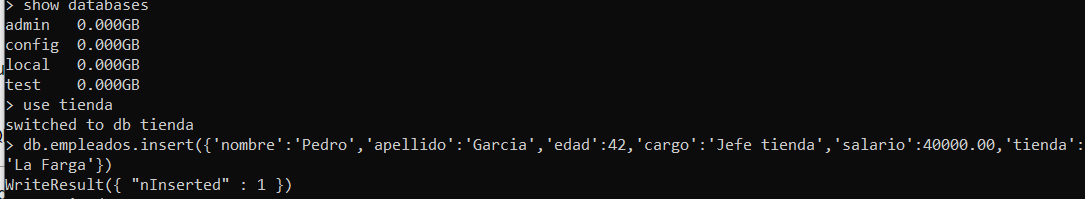

In [79]:
Image.open('mongo1.png')

In [17]:
#nos conectamos localmente a Mongo
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

In [18]:
#Miramos las bases de datos que hay
print(myclient.list_database_names())

['admin', 'config', 'local', 'test', 'tienda']


Vamos a leer nuestra colección de empleados

In [33]:
db=myclient.tienda
empleado = db.empleados
for document in empleado.find():
    print (document)

{'_id': ObjectId('60966bf1e7a30aa81435627c'), 'nombre': 'Pedro', 'apellido': 'Garcia', 'edad': 42.0, 'cargo': 'Jefe tienda', 'salario': 40000.0, 'tienda': 'La Farga'}


Añadimos nuevos datos a empleados:

In [34]:
lista_empleado=[   
    {'nombre':'Luisa','apellido':'Lopez','edad':27,'cargo':'Comercial','salario':30000.00,'tienda':'La Farga'},
    {'nombre':'Andres','apellido':'Martinez','edad':57,'cargo':'Comercial','salario':32000.00,'tienda':'La Farga'},
    {'nombre':'Maria','apellido':'Soto','edad':44,'cargo':'Comercial','salario':30000.00,'tienda':'La Barata'},
    {'nombre':'Sonia','apellido':'Alvarez','edad':27,'cargo':'Jefe tienda','salario':30000.00,'tienda':'La Barata'},
    {'nombre':'Javier','apellido':'Gomez','edad':53,'cargo':'Comercial','salario':40000.00,'tienda':'La Barata'},
    {'nombre':'Pedro','apellido':'Garcia','edad':42,'cargo':'Jefe tienda','salario':38000.00,'tienda':'La Barata'}    
]

In [35]:
#insertamos datos
empleado.insert_many(lista_empleado)

In [36]:
#Vemos que nos los ha añadido a continuación del primer documento
for document in empleado.find():
    print (document)

{'_id': ObjectId('60966bf1e7a30aa81435627c'), 'nombre': 'Pedro', 'apellido': 'Garcia', 'edad': 42.0, 'cargo': 'Jefe tienda', 'salario': 40000.0, 'tienda': 'La Farga'}
{'_id': ObjectId('60966c00c251a31cb8537beb'), 'nombre': 'Luisa', 'apellido': 'Lopez', 'edad': 27, 'cargo': 'Comercial', 'salario': 30000.0, 'tienda': 'La Farga'}
{'_id': ObjectId('60966c00c251a31cb8537bec'), 'nombre': 'Andres', 'apellido': 'Martinez', 'edad': 57, 'cargo': 'Comercial', 'salario': 32000.0, 'tienda': 'La Farga'}
{'_id': ObjectId('60966c00c251a31cb8537bed'), 'nombre': 'Maria', 'apellido': 'Soto', 'edad': 44, 'cargo': 'Comercial', 'salario': 30000.0, 'tienda': 'La Barata'}
{'_id': ObjectId('60966c00c251a31cb8537bee'), 'nombre': 'Sonia', 'apellido': 'Alvarez', 'edad': 27, 'cargo': 'Jefe tienda', 'salario': 30000.0, 'tienda': 'La Barata'}
{'_id': ObjectId('60966c00c251a31cb8537bef'), 'nombre': 'Javier', 'apellido': 'Gomez', 'edad': 53, 'cargo': 'Comercial', 'salario': 40000.0, 'tienda': 'La Barata'}
{'_id': Obje

Creamos una colección de pedidos

In [37]:
pedido=db['pedido']

In [38]:
lista_pedido=[
    {'codigo':1,
     'cliente':'Juan Saez',
     'producto':'Pera Conference',
     'cantidad':7,
     'precio_unidad':10.00,
    'total':70.00,
    'tienda':'La Farga',
     'comercial':'Pedro Garcia'    
    },
   {'codigo':2,
     'cliente':'Carmen Sanchez',
    'producto':'Tejanos azules',
     'cantidad':3,
     'precio_unidad':40.00,
    'total':120.00,
    'tienda':'La Farga',
     'comercial':'Luisa Lopez',
    },
    {'codigo':3,
     'cliente':'Pablo Crespo',
     'producto':'Tornillos cabeza plana',
     'cantidad':60,
     'precio_unidad':1.00,
    'total':60.00,
    'tienda':'La Barata',
     'comercial':'Andres Martinez',   
    }
]

In [39]:
#insertamos datos
pedido.insert_many(lista_pedido)

In [40]:
for document in pedido.find():
    print (document)

{'_id': ObjectId('60966c0ec251a31cb8537bf1'), 'codigo': 1, 'cliente': 'Juan Saez', 'producto': 'Pera Conference', 'cantidad': 7, 'precio_unidad': 10.0, 'total': 70.0, 'tienda': 'La Farga', 'comercial': 'Pedro Garcia'}
{'_id': ObjectId('60966c0ec251a31cb8537bf2'), 'codigo': 2, 'cliente': 'Carmen Sanchez', 'producto': 'Tejanos azules', 'cantidad': 3, 'precio_unidad': 40.0, 'total': 120.0, 'tienda': 'La Farga', 'comercial': 'Luisa Lopez'}
{'_id': ObjectId('60966c0ec251a31cb8537bf3'), 'codigo': 3, 'cliente': 'Pablo Crespo', 'producto': 'Tornillos cabeza plana', 'cantidad': 60, 'precio_unidad': 1.0, 'total': 60.0, 'tienda': 'La Barata', 'comercial': 'Andres Martinez'}


# Nivell 2
#### Exercici 1
Carrega algunes consultes senzilles a un Pandas Dataframe.

In [57]:
df_pedido= pd.DataFrame(pedido.find())
df_pedido

,_id,codigo,cliente,producto,cantidad,precio_unidad,total,tienda,comercial
0,60966c0ec251a31cb8537bf1,1,Juan Saez,Pera Conference,7,10.0,70.0,La Farga,Pedro Garcia
1,60966c0ec251a31cb8537bf2,2,Carmen Sanchez,Tejanos azules,3,40.0,120.0,La Farga,Luisa Lopez
2,60966c0ec251a31cb8537bf3,3,Pablo Crespo,Tornillos cabeza plana,60,1.0,60.0,La Barata,Andres Martinez


In [58]:
df_empleado= pd.DataFrame((empleado.find()))
df_empleado

,_id,nombre,apellido,edad,cargo,salario,tienda
0,60966bf1e7a30aa81435627c,Pedro,Garcia,42.0,Jefe tienda,40000.0,La Farga
1,60966c00c251a31cb8537beb,Luisa,Lopez,27.0,Comercial,30000.0,La Farga
2,60966c00c251a31cb8537bec,Andres,Martinez,57.0,Comercial,32000.0,La Farga
3,60966c00c251a31cb8537bed,Maria,Soto,44.0,Comercial,30000.0,La Barata
4,60966c00c251a31cb8537bee,Sonia,Alvarez,27.0,Jefe tienda,30000.0,La Barata
5,60966c00c251a31cb8537bef,Javier,Gomez,53.0,Comercial,40000.0,La Barata
6,60966c00c251a31cb8537bf0,Pedro,Garcia,42.0,Jefe tienda,38000.0,La Barata


In [62]:
#Número de empleados por tienda
empleados_tienda=empleado.aggregate([{ "$group" : { "_id" : "$tienda", "empleados":{"$sum":1} } } ] )
df_emp=pd.DataFrame(empleados_tienda)
df_emp

,_id,empleados
0,La Barata,4
1,La Farga,3


# Nivell 3
#### Exercici 1
Genera un resum estadístic de la informació que conté la base de dades.

In [65]:
# de la base de datos tienda que la guardamos en la variable db
db.command("dbstats")

{'db': 'tienda',
 'collections': 2,
 'views': 0,
 'objects': 10,
 'avgObjSize': 150.6,
 'dataSize': 1506.0,
 'storageSize': 57344.0,
 'indexes': 2,
 'indexSize': 57344.0,
 'totalSize': 114688.0,
 'scaleFactor': 1.0,
 'fsUsedSize': 392658149376.0,
 'fsTotalSize': 981914873856.0,
 'ok': 1.0}

In [74]:
#Para mirar las estadísticas de las colecciones miramos primero las colecciones de tienda
db.list_collection_names()

['pedido', 'empleados']

In [70]:
#estadísticas empleados
db.command("collstats", "empleados")

{'ns': 'tienda.empleados',
 'size': 925,
 'count': 7,
 'avgObjSize': 132,
 'storageSize': 36864,
 'freeStorageSize': 16384,
 'capped': False,
 'wiredTiger': {'metadata': {'formatVersion': 1},
  'creationString': 'access_pattern_hint=none,allocation_size=4KB,app_metadata=(formatVersion=1),assert=(commit_timestamp=none,durable_timestamp=none,read_timestamp=none,write_timestamp=off),block_allocation=best,block_compressor=snappy,cache_resident=false,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=false,extractor=,format=btree,huffman_key=,huffman_value=,ignore_in_memory_cache_size=false,immutable=false,import=(enabled=false,file_metadata=,repair=false),internal_item_max=0,internal_key_max=0,internal_key_truncate=true,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=true),lsm=(auto_throttle=true,bloom=true,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest

In [75]:
#estadísticas pedido
db.command("collstats", "pedido")

{'ns': 'tienda.pedido',
 'size': 581,
 'count': 3,
 'avgObjSize': 193,
 'storageSize': 20480,
 'freeStorageSize': 0,
 'capped': False,
 'wiredTiger': {'metadata': {'formatVersion': 1},
  'creationString': 'access_pattern_hint=none,allocation_size=4KB,app_metadata=(formatVersion=1),assert=(commit_timestamp=none,durable_timestamp=none,read_timestamp=none,write_timestamp=off),block_allocation=best,block_compressor=snappy,cache_resident=false,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=false,extractor=,format=btree,huffman_key=,huffman_value=,ignore_in_memory_cache_size=false,immutable=false,import=(enabled=false,file_metadata=,repair=false),internal_item_max=0,internal_key_max=0,internal_key_truncate=true,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=true),lsm=(auto_throttle=true,bloom=true,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=false,